### Breast Cancer Detection using Different ML Algorithm

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("C:\ML\Datasets\Breast_Cancer_Detection.csv")
print("Shape of the data: ", data.shape)
data.head(3)

Shape of the data:  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


#### Mapping Class String Values to Numbers/ One-hot encoding

In [3]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1}).astype(int)
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [4]:
# Taking all the rows, starting from column 2 to the last column
X = data.iloc[:, 2:32].values
print(X)
# Taking all the rows, only output column, column 1.
y = data.iloc[:,1]
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Feature Scaling
##### Scale the data to make all the features contribute equally to the result.

In [6]:
from sklearn.preprocessing import StandardScaler
# Creating a standard scaler object
sc = StandardScaler()
# fit_transform calculates the Mean and variance of each of the features present in data
X_train = sc.fit_transform(X_train)
# 'transform' method transforms all the features using the respective mean and variance.
#We want our test data to be completely new and a surprise set for our model.
X_test = sc.transform(X_test)

print(X_train)
print(X_test)

[[-1.15036482 -0.39064196 -1.12855021 ... -0.75798367 -0.01614761
  -0.38503402]
 [-0.93798972  0.68051405 -0.94820146 ... -0.60687023  0.09669004
  -0.38615797]
 [ 0.574121   -1.03333557  0.51394098 ... -0.02371948 -0.20050207
  -0.75144254]
 ...
 [-1.32422924 -0.20048168 -1.31754581 ... -0.97974953 -0.71542314
  -0.11978123]
 [-1.24380987 -0.2245526  -1.28007609 ... -1.75401433 -1.58157125
  -1.00601779]
 [-0.73694129  1.14989702 -0.71226578 ... -0.27460457 -1.25895095
   0.21515662]]
[[-0.20175604  0.3290786  -0.13086754 ...  1.3893291   1.08203284
   1.54029664]
 [-0.25555773  1.46763319 -0.31780437 ... -0.83369364 -0.73131577
  -0.87732522]
 [-0.02619262 -0.8407682  -0.09175081 ... -0.49483785 -1.22080864
  -0.92115937]
 ...
 [ 1.71811488  0.09318356  1.7286186  ...  1.57630515  0.20317063
  -0.15406178]
 [ 1.18859296  0.34352115  1.19333694 ...  0.56019755  0.26991966
  -0.27320074]
 [ 0.26263752 -0.58080224  0.28459338 ... -0.19383705 -1.15564888
   0.11231497]]


### Validating some ML algorithm by its accuracy - Model Socre

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation methods
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#### Selecting Different ML Algorithm Models

In [8]:
models = []
models.append(("LR", LogisticRegression(solver = 'liblinear', multi_class='ovr')))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma='auto')))

models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto'))]

#### Calculating and Plotting of Accuracy of each ML Algorithm Model 

LR : 97.806763
LDA : 95.608696
KNN : 96.487923
CART : 93.623188
NB : 94.956522
SVM : 97.589372


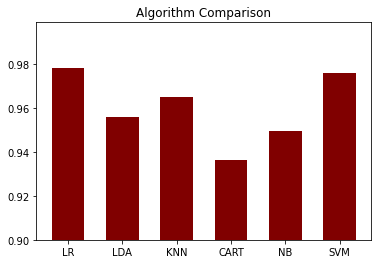

In [23]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append((cv_results.mean()))
    print("%s : %f" % (name, cv_results.mean()*100))
    
plt.ylim(.900, .999)
plt.bar(names, res, color="maroon", width=0.6)

plt.title("Algorithm Comparison")
plt.show()

### Training and Prediction using the Algorithm with Highest Accuracy